In [1]:
#https://mitchellrosenthalofficial.medium.com/crash-course-python-pandas-for-trading-and-investing-part-1-714b77dfdc21

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats as stats
import re
from datetime import datetime
from datetime import date
import random
import seaborn as sns
sns.set()

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
our_index = pd.date_range(start='2019-12-31', end='2021-07-30', freq='D')

In [5]:
df = pd.DataFrame(index = our_index)

In [6]:
df.head()

""
2019-12-31
2020-01-01
2020-01-02
2020-01-03
2020-01-04


In [7]:
df.tail()

""
2021-07-26
2021-07-27
2021-07-28
2021-07-29
2021-07-30


In [8]:
mu = 0.0005
vol = 0.015

In [9]:
df['Daily return'] = np.random.normal(loc=mu, scale=vol, size=578)

In [10]:
df.head()

,Daily return
2019-12-31,0.019793
2020-01-01,-0.005627
2020-01-02,0.039761
2020-01-03,0.004394
2020-01-04,0.002601


In [11]:
df.tail()

,Daily return
2021-07-26,-0.005228
2021-07-27,0.005128
2021-07-28,0.007159
2021-07-29,0.003025
2021-07-30,-0.004873


In [12]:
mu = float(df.mean())
sigma = float(df.std())
minimum = float(df.min())
maximum = float(df.max())
step = (maximum - minimum) / 20

In [13]:
mu, sigma, minimum, maximum, step

(0.0012226475863674952,
 0.014744268347802143,
 -0.04179694343451171,
 0.04277243988786754,
 0.004228469166118963)

In [14]:
distribution = df["Daily return"].groupby(pd.cut(df["Daily return"], np.arange(minimum, maximum + step, step))).count()

In [15]:
distribution = pd.DataFrame(distribution)

In [16]:
distribution.head()

,Daily return
Daily return,
"(-0.0418, -0.0376]",0
"(-0.0376, -0.0333]",3
"(-0.0333, -0.0291]",8
"(-0.0291, -0.0249]",9
"(-0.0249, -0.0207]",17


In [17]:
distribution.tail()

,Daily return
Daily return,
"(0.0216, 0.0259]",20
"(0.0259, 0.0301]",8
"(0.0301, 0.0343]",8
"(0.0343, 0.0385]",6
"(0.0385, 0.0428]",4


In [18]:
distribution.columns = ["Frequency"]
distribution.reset_index()

,Daily return,Frequency
0,"(-0.0418, -0.0376]",0
1,"(-0.0376, -0.0333]",3
2,"(-0.0333, -0.0291]",8
3,"(-0.0291, -0.0249]",9
4,"(-0.0249, -0.0207]",17
5,"(-0.0207, -0.0164]",37
6,"(-0.0164, -0.0122]",35
7,"(-0.0122, -0.00797]",42
8,"(-0.00797, -0.00374]",56
9,"(-0.00374, 0.000488]",58


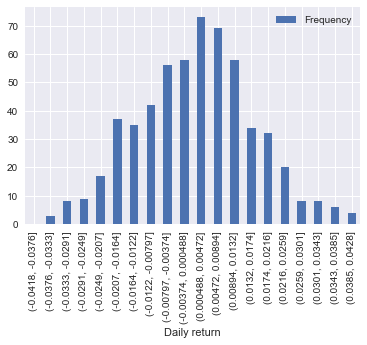

In [19]:
my_plot = distribution.plot.bar()

In [20]:
df = df.rename(columns={'Daily return': 'Close'})

In [21]:
df['Close'] = np.exp(df['Close'])
df['Close'].iloc[0] = 50
df['Close'] = df['Close'].cumprod()

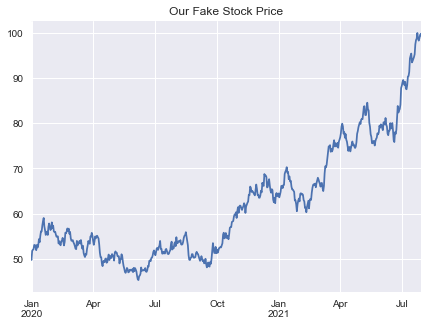

In [22]:
df['Close'].plot(figsize=(7,5), title='Our Fake Stock Price')

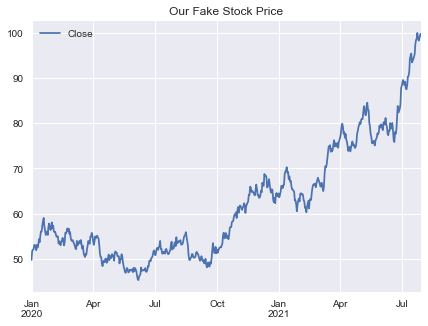

In [23]:
df[['Close']].plot(figsize=(7,5), title='Our Fake Stock Price')

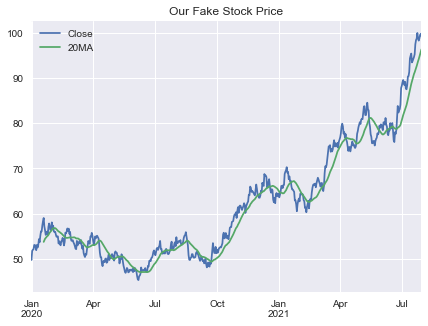

In [24]:
df['20MA'] = df['Close'].rolling(20).mean()
df[['Close','20MA']].plot(figsize=(7,5), title='Our Fake Stock Price')

In [25]:
df['20MAdist'] = -1 + (df['Close'] / df['20MA'])

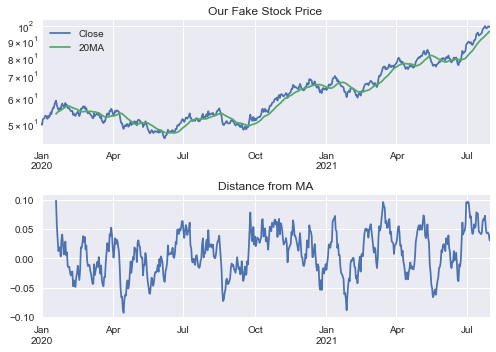

In [26]:
f1 = plt.figure(figsize=(7,5))
ax1 = f1.add_subplot(2, 1, 1)
ax2 = f1.add_subplot(2, 1, 2)

df[['Close','20MA']].plot(title='Our Fake Stock Price', ax=ax1, logy=True)
df['20MAdist'].plot(title='Distance from MA', ax=ax2)
plt.tight_layout()

In [27]:
df['MAsignal'] = np.where(df['Close']>df['20MA'], 1, 0)

In [28]:
df.head()

,Close,20MA,20MAdist,MAsignal
2019-12-31,50.000000,NaN,NaN,0
2020-01-01,49.719434,NaN,NaN,0
2020-01-02,51.736150,NaN,NaN,0
2020-01-03,51.963987,NaN,NaN,0
2020-01-04,52.099319,NaN,NaN,0


In [29]:
df.tail()

,Close,20MA,20MAdist,MAsignal
2021-07-26,98.344989,94.227939,0.043692,1
2021-07-27,98.850565,94.785472,0.042887,1
2021-07-28,99.560778,95.385717,0.043770,1
2021-07-29,99.862390,95.954562,0.040726,1
2021-07-30,99.376913,96.404835,0.030829,1


In [30]:
dfFiltered = df[df['MAsignal']==1]

In [31]:
dfFiltered.head()

,Close,20MA,20MAdist,MAsignal
2020-01-19,59.024519,53.722568,0.098691,1
2020-01-20,57.139453,54.079541,0.056582,1
2020-01-21,56.299729,54.408555,0.034759,1
2020-01-22,55.269462,54.585221,0.012535,1
2020-01-23,55.605603,54.767302,0.015307,1


In [32]:
dfFiltered.tail()

,Close,20MA,20MAdist,MAsignal
2021-07-26,98.344989,94.227939,0.043692,1
2021-07-27,98.850565,94.785472,0.042887,1
2021-07-28,99.560778,95.385717,0.043770,1
2021-07-29,99.862390,95.954562,0.040726,1
2021-07-30,99.376913,96.404835,0.030829,1


In [33]:
truedates = dfFiltered.index.tolist()

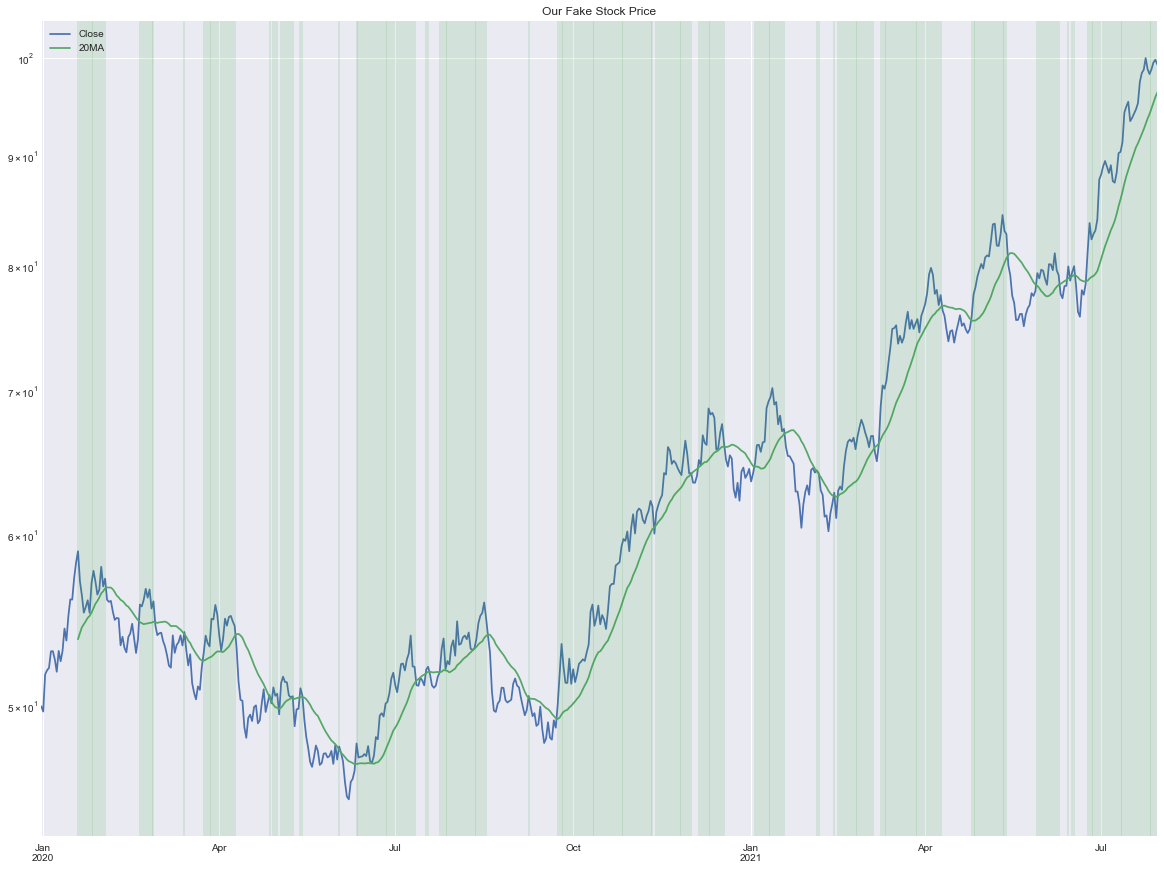

In [34]:
f1 = plt.figure(figsize=(20,15))
ax1 = f1.add_subplot(1, 1, 1)
df[['Close','20MA']].plot(title='Our Fake Stock Price', ax=ax1, logy=True)
for x in truedates:
    ax1.axvline(x, color='tab:green', alpha = 5, linewidth = .25,   linestyle='-')

In [35]:
df['SignalTrue'] = np.where(df['Close']>df['20MA'], df['Close'], np.NaN)
df['SignalFalse'] = np.where(df['Close']>df['20MA'], np.NaN, df['Close'])

In [36]:
df.head()

,Close,20MA,20MAdist,MAsignal,SignalTrue,SignalFalse
2019-12-31,50.000000,NaN,NaN,0,NaN,50.000000
2020-01-01,49.719434,NaN,NaN,0,NaN,49.719434
2020-01-02,51.736150,NaN,NaN,0,NaN,51.736150
2020-01-03,51.963987,NaN,NaN,0,NaN,51.963987
2020-01-04,52.099319,NaN,NaN,0,NaN,52.099319


In [37]:
df.tail()

,Close,20MA,20MAdist,MAsignal,SignalTrue,SignalFalse
2021-07-26,98.344989,94.227939,0.043692,1,98.344989,NaN
2021-07-27,98.850565,94.785472,0.042887,1,98.850565,NaN
2021-07-28,99.560778,95.385717,0.043770,1,99.560778,NaN
2021-07-29,99.862390,95.954562,0.040726,1,99.862390,NaN
2021-07-30,99.376913,96.404835,0.030829,1,99.376913,NaN


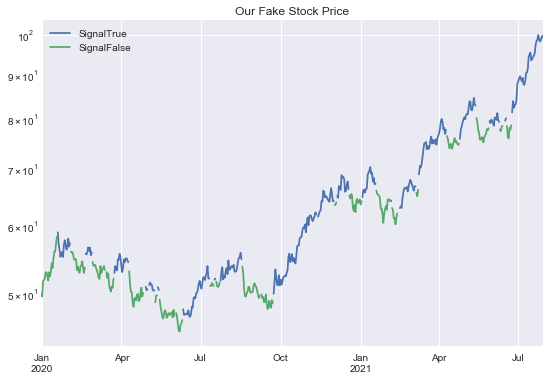

In [38]:
f1 = plt.figure(figsize=(9,6))
ax1 = f1.add_subplot(1, 1, 1)
df[['SignalTrue','SignalFalse']].plot(title='Our Fake Stock Price', ax=ax1, logy=True)

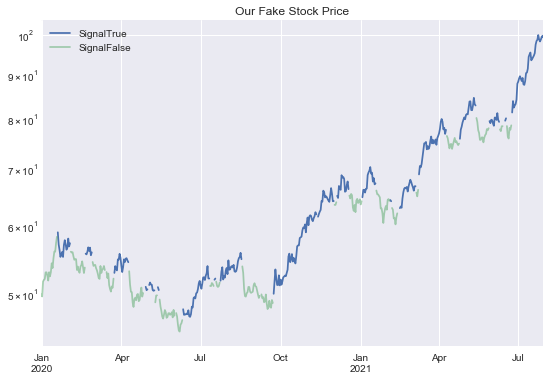

In [39]:
f1 = plt.figure(figsize=(9,6))
ax1 = f1.add_subplot(1, 1, 1)
df[['SignalTrue']].plot(title='Our Fake Stock Price', ax=ax1, logy=True)
df[['SignalFalse']].plot(ax=ax1, alpha=0.50, logy=True)

In [40]:
nb = len(df.index)

In [41]:
nb

578

In [42]:
our_index = pd.date_range(start='2019-12-31', periods=nb*24*2, freq='30T')
df = pd.DataFrame(index = our_index)

In [43]:
df.head()

""
2019-12-31 00:00:00
2019-12-31 00:30:00
2019-12-31 01:00:00
2019-12-31 01:30:00
2019-12-31 02:00:00


In [44]:
df.tail()

""
2021-07-30 21:30:00
2021-07-30 22:00:00
2021-07-30 22:30:00
2021-07-30 23:00:00
2021-07-30 23:30:00


In [45]:
df = df.between_time('09:30', '16:00')

In [46]:
df.head()

""
2019-12-31 09:30:00
2019-12-31 10:00:00
2019-12-31 10:30:00
2019-12-31 11:00:00
2019-12-31 11:30:00


In [47]:
df.tail()

""
2021-07-30 14:00:00
2021-07-30 14:30:00
2021-07-30 15:00:00
2021-07-30 15:30:00
2021-07-30 16:00:00


In [48]:
nb = len(df.index)

In [49]:
nb

8092

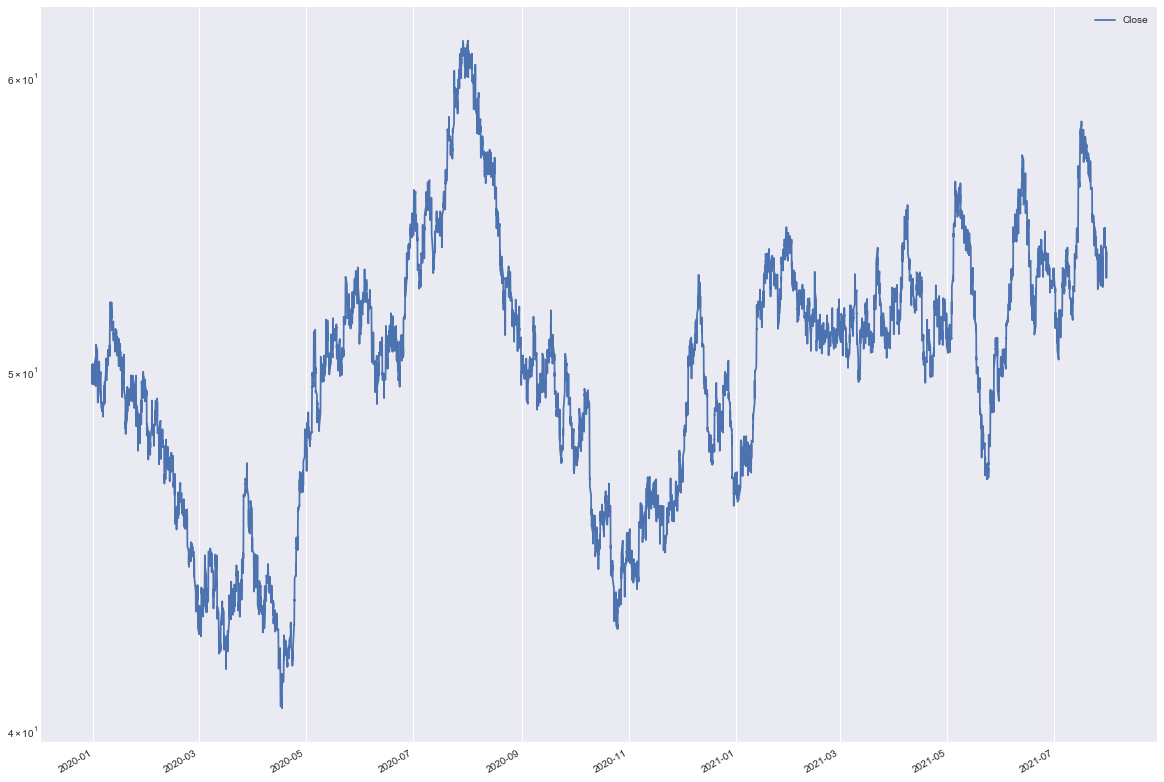

In [50]:
R_old = 0.0005
Stdev_old = 0.015

R_new = (1+R_old)**(1/13)-1
Stdev_new = (Stdev_old)*(1**0.5)*((1/13)**0.5)

df['Close'] = np.random.normal(loc=R_new, scale=Stdev_new, size=nb)
df['Close'] = np.exp(df['Close'])
df['Close'].iloc[0] = 50
df['Close'] = df['Close'].cumprod()
df[['Close']].plot(figsize=(20,15), logy=True)

In [51]:
df.head()

,Close
2019-12-31 09:30:00,50.000000
2019-12-31 10:00:00,49.970437
2019-12-31 10:30:00,49.651888
2019-12-31 11:00:00,49.856653
2019-12-31 11:30:00,49.738540


In [52]:
df.tail()

,Close
2021-07-30 14:00:00,53.021824
2021-07-30 14:30:00,53.302714
2021-07-30 15:00:00,53.540056
2021-07-30 15:30:00,53.442329
2021-07-30 16:00:00,53.877648


In [53]:
df = df.between_time('09:30', '16:00')
df = df['Close'].resample('1D').ohlc()
df.rename(columns={'open':'Open','high':'High','low':'Low','close':'Close'}, inplace=True)

In [54]:
df.head()

,Open,High,Low,Close
2019-12-31,50.000000,50.259354,49.651888,50.259354
2020-01-01,50.021084,50.270647,49.622387,49.983850
2020-01-02,50.359485,50.875799,49.579421,50.875799
2020-01-03,50.694675,50.694675,49.074347,49.074347
2020-01-04,49.407651,50.340194,49.407651,49.846578


In [55]:
df.tail()

,Open,High,Low,Close
2021-07-26,52.889576,53.801799,52.889576,52.952578
2021-07-27,53.055913,54.109959,52.773819,53.256292
2021-07-28,53.343874,54.031451,52.725030,54.031451
2021-07-29,54.126783,54.700508,54.042942,54.170665
2021-07-30,53.925367,54.050423,53.021824,53.877648


In [56]:
df['20MA'] = df['Close'].rolling(100).mean()
df['MAsignal'] = np.where(df['Close']>df['20MA'], 1, 0)

condition1 = (df['MAsignal'].shift(1)==1) & (df['MAsignal'].shift(2)==0)
condition2 = (df['MAsignal'].shift(1)==1) & (df['MAsignal'].shift(2)==1)
condition3 = (df['MAsignal'].shift(1)==0) & (df['MAsignal'].shift(2)==1)

In [57]:
df['PortChng'] = 0

df['PortChng'] = np.where(condition1, -1 + df['Close']/df['Open'], df['PortChng'])
df['PortChng'] = np.where(condition2, -1 + df['Close']/df['Close'].shift(1), df['PortChng'])
df['PortChng'] = np.where(condition3, -1 + df['Open']/df['Close'].shift(1), df['PortChng'])

In [58]:
df.head()

,Open,High,Low,Close,20MA,MAsignal,PortChng
2019-12-31,50.000000,50.259354,49.651888,50.259354,NaN,0,0.0
2020-01-01,50.021084,50.270647,49.622387,49.983850,NaN,0,0.0
2020-01-02,50.359485,50.875799,49.579421,50.875799,NaN,0,0.0
2020-01-03,50.694675,50.694675,49.074347,49.074347,NaN,0,0.0
2020-01-04,49.407651,50.340194,49.407651,49.846578,NaN,0,0.0


In [59]:
df.tail()

,Open,High,Low,Close,20MA,MAsignal,PortChng
2021-07-26,52.889576,53.801799,52.889576,52.952578,52.804024,1,0.004478
2021-07-27,53.055913,54.109959,52.773819,53.256292,52.831924,1,0.003777
2021-07-28,53.343874,54.031451,52.725030,54.031451,52.860193,1,0.014555
2021-07-29,54.126783,54.700508,54.042942,54.170665,52.891086,1,0.002577
2021-07-30,53.925367,54.050423,53.021824,53.877648,52.930567,1,-0.005409


In [60]:
df['Port'] = df['PortChng'] + 1
df['Port'] = (df['Port'].cumprod()) * 50

In [61]:
df.head()

,Open,High,Low,Close,20MA,MAsignal,PortChng,Port
2019-12-31,50.000000,50.259354,49.651888,50.259354,NaN,0,0.0,50.0
2020-01-01,50.021084,50.270647,49.622387,49.983850,NaN,0,0.0,50.0
2020-01-02,50.359485,50.875799,49.579421,50.875799,NaN,0,0.0,50.0
2020-01-03,50.694675,50.694675,49.074347,49.074347,NaN,0,0.0,50.0
2020-01-04,49.407651,50.340194,49.407651,49.846578,NaN,0,0.0,50.0


In [62]:
df.tail()

,Open,High,Low,Close,20MA,MAsignal,PortChng,Port
2021-07-26,52.889576,53.801799,52.889576,52.952578,52.804024,1,0.004478,49.961359
2021-07-27,53.055913,54.109959,52.773819,53.256292,52.831924,1,0.003777,50.150050
2021-07-28,53.343874,54.031451,52.725030,54.031451,52.860193,1,0.014555,50.879997
2021-07-29,54.126783,54.700508,54.042942,54.170665,52.891086,1,0.002577,51.011091
2021-07-30,53.925367,54.050423,53.021824,53.877648,52.930567,1,-0.005409,50.735164


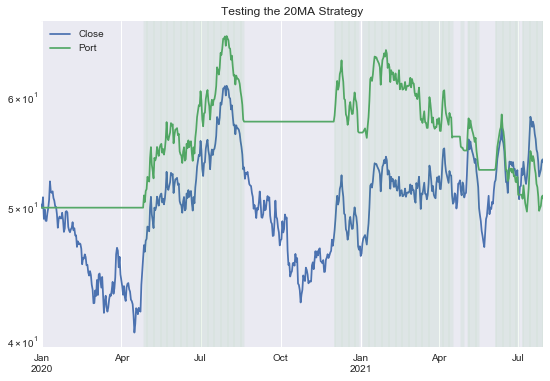

In [63]:
f1 = plt.figure(figsize=(9,6))
ax1 = f1.add_subplot(1, 1, 1)

true_indexvals = df[condition1|condition2|condition3].index.tolist()
df[['Close','Port']].plot(title='Testing the 20MA Strategy', ax=ax1, logy=True)

for x in true_indexvals:
  ax1.axvline(x, color='tab:green', alpha = 0.22, linewidth = .25, linestyle='-')

ax1.legend(loc='upper left')

In [64]:
BidAskPct = 4/(100*100)
list_cols = ['Open','Close']

for i in list_cols:
  df[i+'Ask'] = (2*df[i])/(2-BidAskPct)
  df[i+'Bid'] = (2*df[i]) - (2*df[i])/(2-BidAskPct)

In [65]:
df.head()

,Open,High,Low,Close,20MA,MAsignal,PortChng,Port,OpenAsk,OpenBid,CloseAsk,CloseBid
2019-12-31,50.000000,50.259354,49.651888,50.259354,NaN,0,0.0,50.0,50.010002,49.989998,50.269408,50.249301
2020-01-01,50.021084,50.270647,49.622387,49.983850,NaN,0,0.0,50.0,50.031090,50.011077,49.993848,49.973851
2020-01-02,50.359485,50.875799,49.579421,50.875799,NaN,0,0.0,50.0,50.369559,50.349411,50.885976,50.865622
2020-01-03,50.694675,50.694675,49.074347,49.074347,NaN,0,0.0,50.0,50.704816,50.684534,49.084164,49.064530
2020-01-04,49.407651,50.340194,49.407651,49.846578,NaN,0,0.0,50.0,49.417535,49.397768,49.856549,49.836607


In [66]:
df.tail()

,Open,High,Low,Close,20MA,MAsignal,PortChng,Port,OpenAsk,OpenBid,CloseAsk,CloseBid
2021-07-26,52.889576,53.801799,52.889576,52.952578,52.804024,1,0.004478,49.961359,52.900156,52.878995,52.963171,52.941986
2021-07-27,53.055913,54.109959,52.773819,53.256292,52.831924,1,0.003777,50.150050,53.066527,53.045300,53.266945,53.245638
2021-07-28,53.343874,54.031451,52.725030,54.031451,52.860193,1,0.014555,50.879997,53.354545,53.333203,54.042260,54.020643
2021-07-29,54.126783,54.700508,54.042942,54.170665,52.891086,1,0.002577,51.011091,54.137610,54.115955,54.181501,54.159828
2021-07-30,53.925367,54.050423,53.021824,53.877648,52.930567,1,-0.005409,50.735164,53.936155,53.914580,53.888425,53.866870


In [67]:
df.filter(regex='Open|Close').head()

,Open,Close,OpenAsk,OpenBid,CloseAsk,CloseBid
2019-12-31,50.000000,50.259354,50.010002,49.989998,50.269408,50.249301
2020-01-01,50.021084,49.983850,50.031090,50.011077,49.993848,49.973851
2020-01-02,50.359485,50.875799,50.369559,50.349411,50.885976,50.865622
2020-01-03,50.694675,49.074347,50.704816,50.684534,49.084164,49.064530
2020-01-04,49.407651,49.846578,49.417535,49.397768,49.856549,49.836607


In [68]:
df.filter(regex='Open|Close').tail()

,Open,Close,OpenAsk,OpenBid,CloseAsk,CloseBid
2021-07-26,52.889576,52.952578,52.900156,52.878995,52.963171,52.941986
2021-07-27,53.055913,53.256292,53.066527,53.045300,53.266945,53.245638
2021-07-28,53.343874,54.031451,53.354545,53.333203,54.042260,54.020643
2021-07-29,54.126783,54.170665,54.137610,54.115955,54.181501,54.159828
2021-07-30,53.925367,53.877648,53.936155,53.914580,53.888425,53.866870


In [69]:
df['PortChng'] = 0

df['PortChng'] = np.where(condition1, -1 + df['Close']/df['OpenAsk'], df['PortChng'])
df['PortChng'] = np.where(condition2, -1 + df['Close']/df['Close'].shift(1), df['PortChng'])
df['PortChng'] = np.where(condition3, -1 + df['OpenBid']/df['Close'].shift(1), df['PortChng'])
df['Port'] = df['PortChng'] + 1
df['Port'] = (df['Port'].cumprod())*50

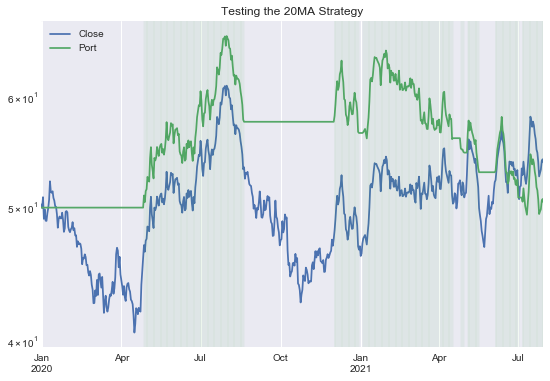

In [70]:
f1 = plt.figure(figsize=(9,6))
ax1 = f1.add_subplot(1, 1, 1)
true_indexvals = df[condition1|condition2|condition3].index.tolist()

df[['Close','Port']].plot(title='Testing the 20MA Strategy', ax=ax1, logy=True)

for x in true_indexvals:
  ax1.axvline(x, color='tab:green', alpha = 0.22, linewidth = .25, linestyle='-')

ax1.legend(loc='upper left')